# 기상청_관광코스별 관광지 상세 날씨 조회서비스

In [1]:
import requests

In [2]:
key = "AW4C5aGoQveejXIPxRkC1JqrIZz8fATRuilN0xaoqVOkhtyzOhWYX%2BMNBTFV1c%2FdxDqo6Q4vS2HAoYeomKAlFA%3D%3D"

In [3]:
url = "http://apis.data.go.kr/1360000/TourStnInfoService/getTourStnVilageFcst"

In [82]:
params ='?'+'numOfRows='+'10'\
'&pageNo='+'1'\
'&CURRENT_DATE='+'2021122010'\
'&HOUR='+'24'\
'&COURSE_ID='+'1'\
'&dataType='+'xml'\
'&serviceKey='+ key


In [83]:
url_api=url+params

In [84]:
print(url)

http://apis.data.go.kr/1360000/TourStnInfoService/getTourStnVilageFcst


In [85]:
print(url_api)

http://apis.data.go.kr/1360000/TourStnInfoService/getTourStnVilageFcst?numOfRows=10&pageNo=1&CURRENT_DATE=2021122010&HOUR=24&COURSE_ID=1&dataType=xml&serviceKey=AW4C5aGoQveejXIPxRkC1JqrIZz8fATRuilN0xaoqVOkhtyzOhWYX%2BMNBTFV1c%2FdxDqo6Q4vS2HAoYeomKAlFA%3D%3D


In [86]:
result = requests.get(url_api)

In [87]:
print(result.content)

b'<?xml version="1.0" encoding="UTF-8"?>\r\n<response><header><resultCode>00</resultCode><resultMsg>NORMAL_SERVICE</resultMsg></header><body><dataType>XML</dataType><items><item><tm>2021-12-22 09:00</tm><thema>\xeb\xac\xb8\xed\x99\x94/\xec\x98\x88\xec\x88\xa0</thema><courseId>1</courseId><courseAreaId>4700000000</courseAreaId><courseAreaName>\xea\xb2\xbd\xec\x83\x81\xeb\xb6\x81\xeb\x8f\x84</courseAreaName><courseName>\xeb\x82\xa8\xed\x98\xb8\xea\xb3\xa0\xed\x83\x9d\xec\x97\x90\xec\x84\x9c\xec\x9d\x98 \xed\x95\x98\xeb\xa3\xbb\xeb\xb0\xa4</courseName><spotAreaId>102</spotAreaId><spotAreaName>\xeb\xb4\x89\xed\x99\x94</spotAreaName><spotName>(\xeb\xb4\x89\xed\x99\x94)\xec\xb6\x98\xec\x96\x91\xeb\xaa\xa9 \xec\x86\xa1\xec\x9d\xb4\xeb\xa7\x88\xec\x9d\x84</spotName><th3>-2</th3><wd>45</wd><ws>2</ws><sky>1</sky><rhm>80</rhm><pop>0</pop></item><item><tm>2021-12-22 09:00</tm><thema>\xec\xa2\x85\xea\xb5\x90/\xec\x97\xad\xec\x82\xac/\xec\xa0\x84\xed\x86\xb5</thema><courseId>1</courseId><courseAreaI

In [88]:
contents=result.text

In [89]:
from bs4 import BeautifulSoup

In [90]:
soup=BeautifulSoup(contents, "html.parser")

In [91]:
soup

<?xml version="1.0" encoding="UTF-8"?>
<response><header><resultcode>00</resultcode><resultmsg>NORMAL_SERVICE</resultmsg></header><body><datatype>XML</datatype><items><item><tm>2021-12-22 09:00</tm><thema>문화/예술</thema><courseid>1</courseid><courseareaid>4700000000</courseareaid><courseareaname>경상북도</courseareaname><coursename>남호고택에서의 하룻밤</coursename><spotareaid>102</spotareaid><spotareaname>봉화</spotareaname><spotname>(봉화)춘양목 송이마을</spotname><th3>-2</th3><wd>45</wd><ws>2</ws><sky>1</sky><rhm>80</rhm><pop>0</pop></item><item><tm>2021-12-22 09:00</tm><thema>종교/역사/전통</thema><courseid>1</courseid><courseareaid>4700000000</courseareaid><courseareaname>경상북도</courseareaname><coursename>남호고택에서의 하룻밤</coursename><spotareaid>104</spotareaid><spotareaname>봉화</spotareaname><spotname>(봉화)계서당(성이성 생가)</spotname><th3>0</th3><wd>41</wd><ws>2</ws><sky>1</sky><rhm>75</rhm><pop>0</pop></item><item><tm>2021-12-22 09:00</tm><thema>자연/힐링</thema><courseid>1</courseid><courseareaid>4700000000</courseareaid><cours

In [92]:
tour_List=[]

In [93]:
for item in soup.find_all('item'):
    spotName=item.find('spotname').text
    w=item.find('th3').text
    tour_List.append([spotName, w])

In [94]:
import pandas as pd

In [95]:
tour_df=pd.DataFrame(tour_List, columns=['관광지명', '일3시간 온도'])

In [117]:
tour_df2=pd.DataFrame(tour_List)

In [118]:
tour_df2

,0,1
0,(봉화)춘양목 송이마을,-2
1,(봉화)계서당(성이성 생가),0
2,(봉화)계서당(성이성 생가),0
3,(봉화)계서당(성이성 생가),0
4,(봉화)지림사,0
5,(봉화)지림사,0
6,(봉화)지림사,0
7,(봉화)지림사,0
8,(봉화)계서당(성이성 생가),0
9,(봉화)춘양목 송이마을,-2


In [119]:
tour_List

[['(봉화)춘양목 송이마을', '-2'],
 ['(봉화)계서당(성이성 생가)', '0'],
 ['(봉화)계서당(성이성 생가)', '0'],
 ['(봉화)계서당(성이성 생가)', '0'],
 ['(봉화)지림사', '0'],
 ['(봉화)지림사', '0'],
 ['(봉화)지림사', '0'],
 ['(봉화)지림사', '0'],
 ['(봉화)계서당(성이성 생가)', '0'],
 ['(봉화)춘양목 송이마을', '-2']]

In [96]:
tour_df

,관광지명,일3시간 온도
0,(봉화)춘양목 송이마을,-2
1,(봉화)계서당(성이성 생가),0
2,(봉화)계서당(성이성 생가),0
3,(봉화)계서당(성이성 생가),0
4,(봉화)지림사,0
5,(봉화)지림사,0
6,(봉화)지림사,0
7,(봉화)지림사,0
8,(봉화)계서당(성이성 생가),0
9,(봉화)춘양목 송이마을,-2


In [97]:
tour_df.to_csv('tourWeather.csv', index=False, encoding='cp949')

In [98]:
pip install xmltodict

Note: you may need to restart the kernel to use updated packages.


In [99]:
import xmltodict

In [100]:
dt = xmltodict.parse(contents)

In [101]:
print(dt)

OrderedDict([('response', OrderedDict([('header', OrderedDict([('resultCode', '00'), ('resultMsg', 'NORMAL_SERVICE')])), ('body', OrderedDict([('dataType', 'XML'), ('items', OrderedDict([('item', [OrderedDict([('tm', '2021-12-22 09:00'), ('thema', '문화/예술'), ('courseId', '1'), ('courseAreaId', '4700000000'), ('courseAreaName', '경상북도'), ('courseName', '남호고택에서의 하룻밤'), ('spotAreaId', '102'), ('spotAreaName', '봉화'), ('spotName', '(봉화)춘양목 송이마을'), ('th3', '-2'), ('wd', '45'), ('ws', '2'), ('sky', '1'), ('rhm', '80'), ('pop', '0')]), OrderedDict([('tm', '2021-12-22 09:00'), ('thema', '종교/역사/전통'), ('courseId', '1'), ('courseAreaId', '4700000000'), ('courseAreaName', '경상북도'), ('courseName', '남호고택에서의 하룻밤'), ('spotAreaId', '104'), ('spotAreaName', '봉화'), ('spotName', '(봉화)계서당(성이성 생가)'), ('th3', '0'), ('wd', '41'), ('ws', '2'), ('sky', '1'), ('rhm', '75'), ('pop', '0')]), OrderedDict([('tm', '2021-12-22 09:00'), ('thema', '자연/힐링'), ('courseId', '1'), ('courseAreaId', '4700000000'), ('courseAreaName

In [102]:
print(dt['response']['body']['items'])

OrderedDict([('item', [OrderedDict([('tm', '2021-12-22 09:00'), ('thema', '문화/예술'), ('courseId', '1'), ('courseAreaId', '4700000000'), ('courseAreaName', '경상북도'), ('courseName', '남호고택에서의 하룻밤'), ('spotAreaId', '102'), ('spotAreaName', '봉화'), ('spotName', '(봉화)춘양목 송이마을'), ('th3', '-2'), ('wd', '45'), ('ws', '2'), ('sky', '1'), ('rhm', '80'), ('pop', '0')]), OrderedDict([('tm', '2021-12-22 09:00'), ('thema', '종교/역사/전통'), ('courseId', '1'), ('courseAreaId', '4700000000'), ('courseAreaName', '경상북도'), ('courseName', '남호고택에서의 하룻밤'), ('spotAreaId', '104'), ('spotAreaName', '봉화'), ('spotName', '(봉화)계서당(성이성 생가)'), ('th3', '0'), ('wd', '41'), ('ws', '2'), ('sky', '1'), ('rhm', '75'), ('pop', '0')]), OrderedDict([('tm', '2021-12-22 09:00'), ('thema', '자연/힐링'), ('courseId', '1'), ('courseAreaId', '4700000000'), ('courseAreaName', '경상북도'), ('courseName', '남호고택에서의 하룻밤'), ('spotAreaId', '104'), ('spotAreaName', '봉화'), ('spotName', '(봉화)계서당(성이성 생가)'), ('th3', '0'), ('wd', '41'), ('ws', '2'), ('sky', '1

In [103]:
import json

In [104]:
jsonString=json.dumps(dt['response']['body']['items'])

In [106]:
jsonString

'{"item": [{"tm": "2021-12-22 09:00", "thema": "\\ubb38\\ud654/\\uc608\\uc220", "courseId": "1", "courseAreaId": "4700000000", "courseAreaName": "\\uacbd\\uc0c1\\ubd81\\ub3c4", "courseName": "\\ub0a8\\ud638\\uace0\\ud0dd\\uc5d0\\uc11c\\uc758 \\ud558\\ub8fb\\ubc24", "spotAreaId": "102", "spotAreaName": "\\ubd09\\ud654", "spotName": "(\\ubd09\\ud654)\\ucd98\\uc591\\ubaa9 \\uc1a1\\uc774\\ub9c8\\uc744", "th3": "-2", "wd": "45", "ws": "2", "sky": "1", "rhm": "80", "pop": "0"}, {"tm": "2021-12-22 09:00", "thema": "\\uc885\\uad50/\\uc5ed\\uc0ac/\\uc804\\ud1b5", "courseId": "1", "courseAreaId": "4700000000", "courseAreaName": "\\uacbd\\uc0c1\\ubd81\\ub3c4", "courseName": "\\ub0a8\\ud638\\uace0\\ud0dd\\uc5d0\\uc11c\\uc758 \\ud558\\ub8fb\\ubc24", "spotAreaId": "104", "spotAreaName": "\\ubd09\\ud654", "spotName": "(\\ubd09\\ud654)\\uacc4\\uc11c\\ub2f9(\\uc131\\uc774\\uc131 \\uc0dd\\uac00)", "th3": "0", "wd": "41", "ws": "2", "sky": "1", "rhm": "75", "pop": "0"}, {"tm": "2021-12-22 09:00", "thema"

In [107]:
# 관광지명과 일 3시간 온도의 시각화

In [108]:
import matplotlib.pyplot as plt

In [109]:
tour_weather = pd.read_csv('tourWeather.csv', encoding='cp949')

In [116]:
tour_weather

,관광지명,일3시간 온도
0,(봉화)춘양목 송이마을,-2
1,(봉화)계서당(성이성 생가),0
2,(봉화)계서당(성이성 생가),0
3,(봉화)계서당(성이성 생가),0
4,(봉화)지림사,0
5,(봉화)지림사,0
6,(봉화)지림사,0
7,(봉화)지림사,0
8,(봉화)계서당(성이성 생가),0
9,(봉화)춘양목 송이마을,-2


In [115]:
tour = tour_weather.drop_duplicates(['spotName'], ignore_index=True)

KeyError: Index(['spotName'], dtype='object')

In [120]:
tour_weather

,관광지명,일3시간 온도
0,(봉화)춘양목 송이마을,-2
1,(봉화)계서당(성이성 생가),0
2,(봉화)계서당(성이성 생가),0
3,(봉화)계서당(성이성 생가),0
4,(봉화)지림사,0
5,(봉화)지림사,0
6,(봉화)지림사,0
7,(봉화)지림사,0
8,(봉화)계서당(성이성 생가),0
9,(봉화)춘양목 송이마을,-2


<AxesSubplot:>

/Users/cmbae/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/cmbae/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/cmbae/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/cmbae/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/cmbae/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/cmbae/opt/anaconda3/lib/python3.9/site-packages/matplotlib

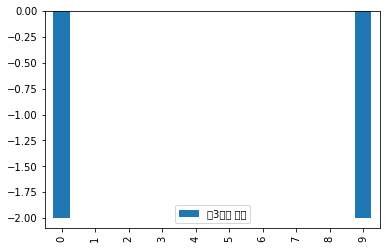

In [121]:
tour_weather.plot(kind='bar')

<AxesSubplot:>

/Users/cmbae/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/cmbae/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/cmbae/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/cmbae/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/cmbae/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/cmbae/opt/anaconda3/lib/python3.9/site-packages/matplotlib

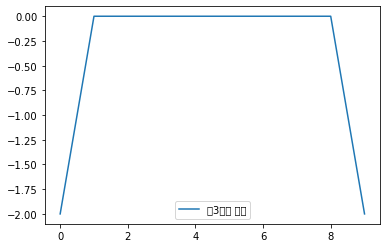

In [122]:
tour_weather.plot(kind='line')